In [25]:
import requests
from bs4 import BeautifulSoup

In [26]:
# Send a GET request to the URL
url = "https://en.wikipedia.org/wiki/List_of_highest-grossing_films"
response = requests.get(url)

In [49]:
# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Parse the HTML content
    soup = BeautifulSoup(response.content, 'html.parser')

    # Find the table containing the list of highest-grossing films
    table = soup.find('table', {'class': 'wikitable'})

    # Initialize lists to store film data
    film_data = []

    # Iterate over rows in the table
    for row in table.find_all('tr')[1:]:  # Skip the header row
        # Extract data from each column
        columns = row.find_all('td')
        if len(columns) >= 5:  # Ensure that the row contains enough columns
            rank = columns[0].text.strip()
            title = columns[2].text.strip()
            gross = columns[3].text.strip()
            year = columns[4].text.strip()

            # Add data to the list
            film_data.append({
                'Rank': rank,
                'Title': title,
                'Worldwide Gross': gross,
                'Year': year
            })

In [50]:
# Print the highest grossing film
highest_grossing_film = max(film_data, key=lambda x: int(x['Worldwide Gross'].replace('$', '').replace(',', '')))
print("1. Highest Grossing Film:")
print(f"Title: {highest_grossing_film['Title']}, Worldwide Gross: {highest_grossing_film['Worldwide Gross']}")

1. Highest Grossing Film:
Title: $1,445,638,421, Worldwide Gross: 2023


In [51]:
# Print the number of films in the list
print("Number of List Items:", len(film_data))

Number of List Items: 50


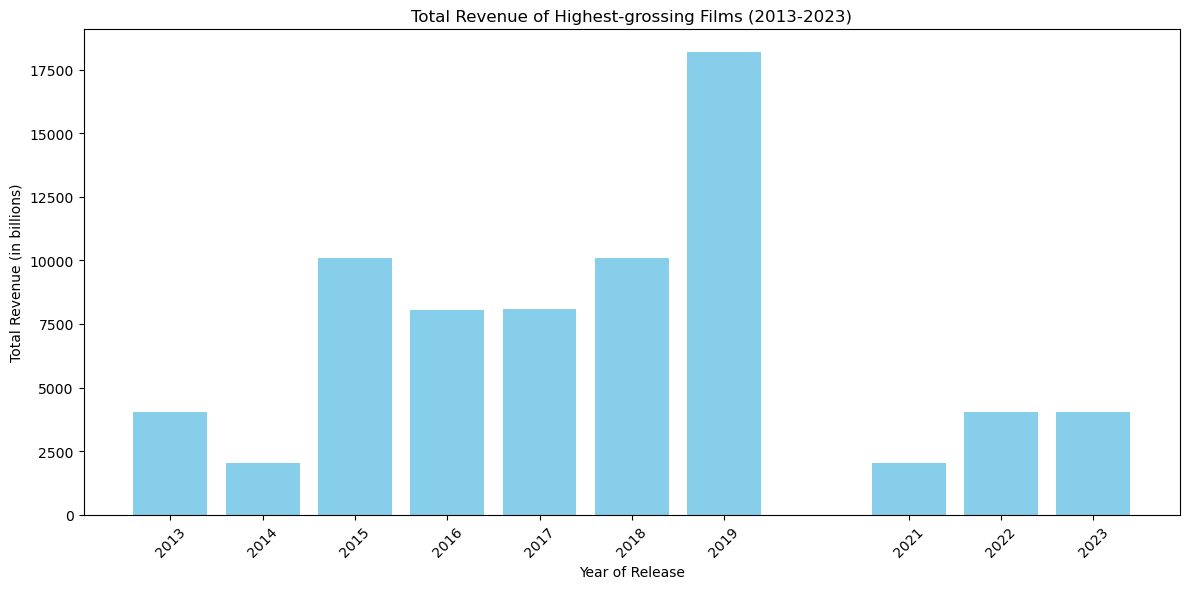

In [61]:
import matplotlib.pyplot as plt

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Parse the HTML content
    soup = BeautifulSoup(response.content, 'html.parser')

    # Find the table containing the list of highest-grossing films
    table = soup.find('table', {'class': 'wikitable'})

    # Initialize a dictionary to store revenues according to the year of release
    revenues_by_year = {}

    # Iterate over rows in the table
    for row in table.find_all('tr')[1:]:  # Skip the header row
        # Extract data from each column
        columns = row.find_all('td')
        if len(columns) >= 5:  # Ensure that the row contains enough columns
            year_str = columns[3].text.strip()

            # Check if the year is a valid integer
            if year_str.isdigit():
                year = int(year_str)
                gross = columns[3].text.strip().replace('$', '').replace(',', '')

                # Filter data for years 2023 to 2013
                if 2023 >= year >= 2013:
                    # Add revenue to the respective year in the dictionary
                    if year in revenues_by_year:
                        revenues_by_year[year] += int(gross)
                    else:
                        revenues_by_year[year] = int(gross)

    # Sort the dictionary by year
    sorted_revenues_by_year = dict(sorted(revenues_by_year.items()))

    # Extract years and revenues for plotting
    years = list(sorted_revenues_by_year.keys())
    revenues = list(sorted_revenues_by_year.values())

    # Create a bar plot
    plt.figure(figsize=(12, 6))
    plt.bar(years, revenues, color='skyblue')
    plt.xlabel('Year of Release')
    plt.ylabel('Total Revenue (in billions)')
    plt.title('Total Revenue of Highest-grossing Films (2013-2023)')
    plt.xticks(years, rotation=45)
    plt.tight_layout()
    plt.show()

else:
    print("Failed to retrieve the webpage. Status code:", response.status_code)
